In [1]:

!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-07-21 14:23:23--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.73.110, 52.217.121.80, 52.216.216.104, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.73.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2024-07-21 14:23:23 (113 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [2]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [3]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

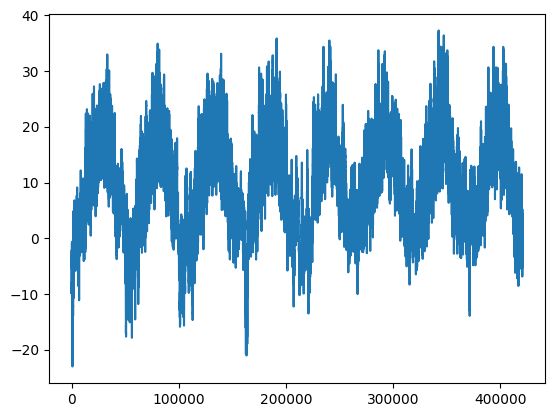

In [4]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

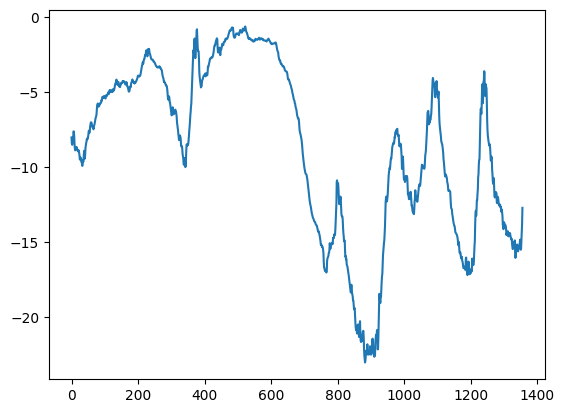

In [5]:
plt.plot(range(1356), temperature[:1356])

In [6]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [3]:
import numpy as np

# Example data
raw_data = np.random.rand(100, 10)  # 100 samples, 10 features each
num_train_samples = 80  # Number of training samples

# Standardization
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

print("Mean:", mean)
print("Standard Deviation:", std)
print("Standardized Data:", raw_data)


Mean: [0.44837712 0.49624755 0.4916667  0.53841752 0.50310381 0.48259574
 0.48690152 0.53600393 0.52037976 0.53384258]
Standard Deviation: [0.31429193 0.2791009  0.27888732 0.27353344 0.28029918 0.2694042
 0.28789491 0.27504622 0.28329405 0.26801794]
Standardized Data: [[-1.11681060e+00  1.13061129e+00 -8.34952085e-01  1.33926209e+00
  -1.38937976e+00  9.82221138e-03  9.43605066e-01  9.36444834e-01
  -1.61333146e+00  3.61374533e-01]
 [-9.94676093e-01  7.48451325e-01  8.35703877e-01  1.63415918e+00
  -1.54971844e+00  7.01401097e-02 -9.09670819e-01 -5.80628052e-01
  -7.25833085e-02  8.29899356e-01]
 [-6.20062733e-01 -1.64905652e-01 -3.95943628e-01  2.62145535e-01
  -6.80081541e-02  7.26979430e-01 -2.56806035e-01 -9.78587134e-01
  -5.80021887e-01  7.70115817e-01]
 [-1.41812878e+00  3.01041324e-01  2.68248002e-01 -8.12220570e-01
  -1.11443962e+00  1.90154924e+00 -1.14322381e+00 -1.33549418e+00
  -1.71354036e+00  1.02774054e+00]
 [ 2.94627555e-01 -8.59954224e-01  1.35025609e+00  8.99516772e

In [4]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Example data
num_samples = 10000
num_features = 10
raw_data = np.random.rand(num_samples, num_features)  # Random data for features
temperature = np.random.rand(num_samples)  # Random data for targets

# Define training, validation, and test sizes
num_train_samples = 6000
num_val_samples = 2000
num_test_samples = num_samples - num_train_samples - num_val_samples

# Standardize the raw_data
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

# Parameters
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

# Create datasets
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)


In [7]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 10)
targets shape: (256,)


In [8]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 0.33
Test MAE: 0.33


In [9]:
import keras
from keras import layers

In [10]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/15
21/21 [==============================] - 17s 444ms/step - loss: 0.1561 - mae: 0.3204 - val_loss: 0.0869 - val_mae: 0.2503
Epoch 2/15
21/21 [==============================] - 8s 380ms/step - loss: 0.1130 - mae: 0.2797 - val_loss: 0.0830 - val_mae: 0.2478
Epoch 3/15
21/21 [==============================] - 8s 336ms/step - loss: 0.1043 - mae: 0.2701 - val_loss: 0.0835 - val_mae: 0.2476
Epoch 4/15
21/21 [==============================] - 9s 412ms/step - loss: 0.1041 - mae: 0.2714 - val_loss: 0.0839 - val_mae: 0.2482
Epoch 5/15
21/21 [==============================] - 9s 397ms/step - loss: 0.0987 - mae: 0.2648 - val_loss: 0.0821 - val_mae: 0.2476
Epoch 6/15
21/21 [==============================] - 7s 340ms/step - loss: 0.0982 - mae: 0.2648 - val_loss: 0.0856 - val_mae: 0.2502
Epoch 7/15
21/21 [==============================] - 11s 495ms/step - loss: 0.0963 - mae: 0.2629 - val_loss: 0.0829 - val_mae: 0.2476
Epoch 8/15
21/21 [==============================] - 9s 406ms/step - loss: 

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 10)]         0         
                                                                 
 gru (GRU)                   (None, 120, 32)           4224      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 10593 (41.38 KB)
Trainable params: 10593 (41.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


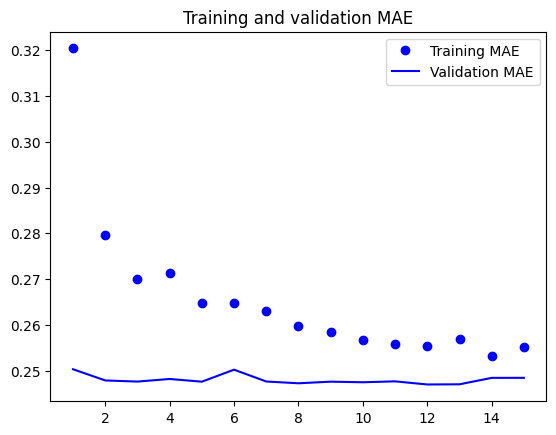

In [12]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [13]:
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 2s 57ms/step - loss: 0.0841 - mae: 0.2473
Test MAE: 0.25


In [14]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=12,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/12
21/21 [==============================] - 18s 420ms/step - loss: 0.1730 - mae: 0.3351 - val_loss: 0.0888 - val_mae: 0.2543
Epoch 2/12
21/21 [==============================] - 9s 413ms/step - loss: 0.1186 - mae: 0.2842 - val_loss: 0.0858 - val_mae: 0.2507
Epoch 3/12
21/21 [==============================] - 8s 376ms/step - loss: 0.1108 - mae: 0.2791 - val_loss: 0.0866 - val_mae: 0.2512
Epoch 4/12
21/21 [==============================] - 7s 336ms/step - loss: 0.1033 - mae: 0.2696 - val_loss: 0.0839 - val_mae: 0.2496
Epoch 5/12
21/21 [==============================] - 8s 335ms/step - loss: 0.0995 - mae: 0.2652 - val_loss: 0.0831 - val_mae: 0.2483
Epoch 6/12
21/21 [==============================] - 9s 407ms/step - loss: 0.0982 - mae: 0.2645 - val_loss: 0.0841 - val_mae: 0.2491
Epoch 7/12
21/21 [==============================] - 12s 556ms/step - loss: 0.0952 - mae: 0.2611 - val_loss: 0.0837 - val_mae: 0.2488
Epoch 8/12
21/21 [==============================] - 7s 334ms/step - loss: 

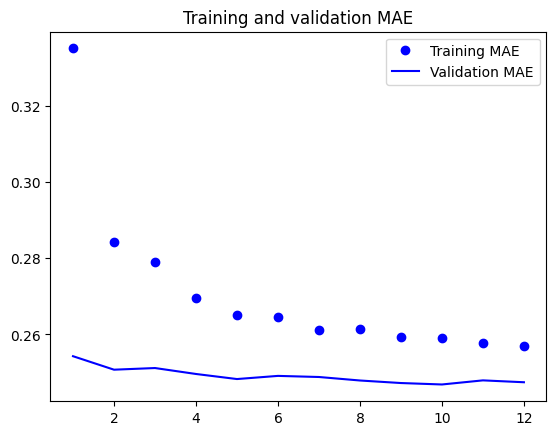

In [15]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()


In [16]:
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 2s 95ms/step - loss: 0.0825 - mae: 0.2453
Test MAE: 0.25


In [17]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
21/21 [==============================] - 5s 134ms/step - loss: 0.2588 - mae: 0.4192 - val_loss: 0.1856 - val_mae: 0.3513
Epoch 2/10
21/21 [==============================] - 2s 88ms/step - loss: 0.1265 - mae: 0.2927 - val_loss: 0.1030 - val_mae: 0.2695
Epoch 3/10
21/21 [==============================] - 3s 141ms/step - loss: 0.0954 - mae: 0.2621 - val_loss: 0.0906 - val_mae: 0.2565
Epoch 4/10
21/21 [==============================] - 2s 92ms/step - loss: 0.0905 - mae: 0.2572 - val_loss: 0.0875 - val_mae: 0.2527
Epoch 5/10
21/21 [==============================] - 2s 90ms/step - loss: 0.0887 - mae: 0.2556 - val_loss: 0.0865 - val_mae: 0.2513
Epoch 6/10
21/21 [==============================] - 2s 90ms/step - loss: 0.0874 - mae: 0.2535 - val_loss: 0.0863 - val_mae: 0.2511
Epoch 7/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0865 - mae: 0.2528 - val_loss: 0.0852 - val_mae: 0.2501
Epoch 8/10
21/21 [==============================] - 2s 90ms/step - loss: 0.0857 

In [18]:

model.evaluate(test_dataset)

2/2 [==============================] - 0s 28ms/step - loss: 0.0853 - mae: 0.2468


[0.08534367382526398, 0.24683429300785065]

In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 10)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1728      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1745 (6.82 KB)
Trainable params: 1745 (6.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


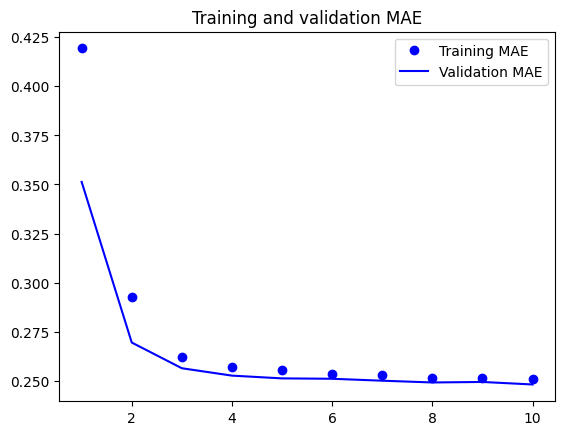

In [20]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [21]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)
model.evaluate(test_dataset)

Epoch 1/10
21/21 [==============================] - 3s 99ms/step - loss: 0.0939 - mae: 0.2609 - val_loss: 0.0860 - val_mae: 0.2490
Epoch 2/10
21/21 [==============================] - 4s 155ms/step - loss: 0.0849 - mae: 0.2515 - val_loss: 0.0856 - val_mae: 0.2483
Epoch 3/10
21/21 [==============================] - 3s 103ms/step - loss: 0.0830 - mae: 0.2488 - val_loss: 0.0844 - val_mae: 0.2478
Epoch 4/10
21/21 [==============================] - 2s 69ms/step - loss: 0.0824 - mae: 0.2475 - val_loss: 0.0849 - val_mae: 0.2500
Epoch 5/10
21/21 [==============================] - 2s 66ms/step - loss: 0.0815 - mae: 0.2463 - val_loss: 0.0851 - val_mae: 0.2503
Epoch 6/10
21/21 [==============================] - 2s 67ms/step - loss: 0.0813 - mae: 0.2455 - val_loss: 0.0841 - val_mae: 0.2482
Epoch 7/10
21/21 [==============================] - 2s 66ms/step - loss: 0.0809 - mae: 0.2451 - val_loss: 0.0842 - val_mae: 0.2491
Epoch 8/10
21/21 [==============================] - 3s 107ms/step - loss: 0.0810 

[0.09717320650815964, 0.26244938373565674]

In [22]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 10)]         0         
                                                                 
 conv1d (Conv1D)             (None, 97, 8)             1928      
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 8)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 8)             776       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 8)             392 

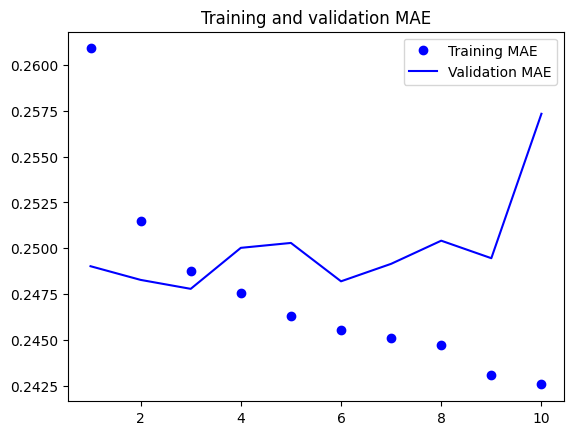

In [23]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()